In [225]:
# それぞれの作者ごとに１つのファイルにまとめる。
!rm akuta/in.csv
!cat akuta/* > akuta/in.csv

!rm izumi/in.csv
!cat izumi/* > izumi/in.csv

rm: akuta/in.csv: No such file or directory


In [226]:
# 初期準備(空のファイルout.csvを作っておく)
!rm out.csv
!touch out.csv

rm: out.csv: No such file or directory


In [227]:
# 引数で指定したファイルの中から名詞を取り出す関数
import re
import numpy as np
import pyprind
import pandas as pd
import os
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def createNone(in_name):
    words = ""
    data_count = 0
    with open("out.csv") as f:
        lines = f.readlines()
    with open("out.csv", "w") as f_out:
        for line in lines:
            f_out.write("{}\n".format(line[:-1]))
        with open("{}".format(in_name)) as f_in:        
            line = f_in.readline()
            html_row_line = re.match("([^,]*),([^,]*)", line)
            html = html_row_line.group(1)
            row = html_row_line.group(2)
            while line:
                search_line = re.match("([^,]*,){3}([^,]*),([^,]*)", line)
                if search_line is not None:
                    if search_line.group(3) == "名詞" or search_line.group(3) == "動詞":
                        words += " " + search_line.group(2)
                line = f_in.readline()
                html_row_line = re.match("([^,]*),([^,]*)", line)
                if html_row_line is None:
                    f_out.write("{}\n".format(words))
                    data_count+=1
                    break
                if html_row_line.group(1) != html:
                    f_out.write("{}\n".format(words))
                    words = ""
                    data_count+=1
                    html = html_row_line.group(1)
    return data_count
    

In [228]:
# ファイルから名詞を取り出すと同時に、学習用のラベルを作る。
label_train = []

for n in range(createNone("akuta/in.csv")):
    label_train.append(0)

for n in range(createNone("izumi/in.csv")):
    label_train.append(1)

print(label_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [236]:
# 名詞を特徴ベクトルに変換 (BoW)
count = CountVectorizer() 
with open("out.csv") as f:
    lines = f.readlines()
    bag = count.fit_transform(lines)

In [230]:
# 単語の関連性を評価(TF-IDF)
np.set_printoptions(precision=2)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
data_train = tfidf.fit_transform(count.fit_transform(lines)).toarray()


In [231]:
# 学習
estimator = RandomForestClassifier(n_estimators=10)
estimator.fit(data_train, label_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [232]:
# 元データを入れて試してみる
label_predict = estimator.predict(data_train)
print(label_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [233]:
print(estimator.score(data_train, label_train))

0.9945945945945946


In [234]:
# 6割を学習用、 4割を試験用にする
data_train_s, data_test_s, label_train_s, label_test_s = train_test_split(data_train, label_train, test_size=0.4)

# 学習用に切り出したやつだけで学習
estimator.fit(data_train_s, label_train_s)

# 予測。正解が分かってる場合は、predict関数じゃなくてこうやると、正解率出してくれる
print(estimator.score(data_test_s, label_test_s))

0.9054054054054054


In [179]:
print("混同行列(confusion matrix)")
print(confusion_matrix(label_test_s, estimator.predict(data_test_s)))
[[TP, FN],[FP, TN]] = confusion_matrix(label_test_s, estimator.predict(data_test_s))


混同行列(confusion matrix)
[[77  0]
 [11 60]]


In [222]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
error_rate = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
false_positive_rate = FP/(TN+FP)
false_negative_rate = FN/(TP+FN)

print("正解率 (Accuracy)", accuracy, "\n\tデータを正しく分類できた割合。\n")
print("不正解率 (Error rate)", error_rate, "\n\tデータを正しく分類できなかった割合。\n")
print("芥川に対する適合率/精度 (Precision)", precision, "\n\t見つけたもののうち、それが本当に欲しいものである割合。\n")
print("芥川に対する検出率 (Recall)", recall, "\n\t見つけるべきもののうち、正しく見つけることができた割合。\n")
print("芥川に対する特異度 (Specificity)", specificity, "\n\tアラートしてはいけないもののうち、きちんと黙っていられた割合。\n")
print("芥川に対する偽陽性率 (False positive rate)", false_positive_rate, "\n\tアラートしてはいけないもののうち、アラートを出してしまったものの割合。\n")
print("芥川に対する偽陰性率 (False negative rate)", false_negative_rate, "\n\tアラートすべきもののうち、アラートできなかったものの割合。\n")
      

正解率 (Accuracy) 0.9256756756756757 
	データを正しく分類できた割合。

不正解率 (Error rate) 0.07432432432432434 
	データを正しく分類できなかった割合。

芥川に対する適合率/精度 (Precision) 0.875 
	見つけたもののうち、それが本当に欲しいものである割合。

芥川に対する検出率 (Recall) 1.0 
	見つけるべきもののうち、正しく見つけることができた割合。

芥川に対する特異度 (Specificity) 0.8450704225352113 
	アラートしてはいけないもののうち、きちんと黙っていられた割合。

芥川に対する偽陽性率 (False positive rate) 0.15492957746478872 
	アラートしてはいけないもののうち、アラートを出してしまったものの割合。

芥川に対する偽陰性率 (False negative rate) 0.0 
	アラートすべきもののうち、アラートできなかったものの割合。



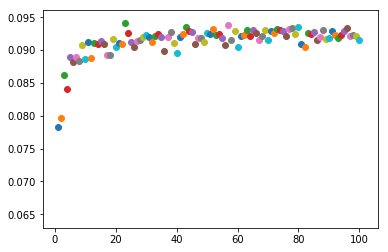

In [221]:
# パラメータ(決定木の個数)を変えて学習させる
for n_e in range(100):
    estimator = RandomForestClassifier(n_estimators=n_e+1)
    sum = 0.0
    for n in range(10):
        data_train_s, data_test_s, label_train_s, label_test_s = train_test_split(data_train, label_train, test_size=0.4)
        estimator.fit(data_train_s, label_train_s)
        sum += estimator.score(data_test_s, label_test_s)
    pyplot.scatter(n_e+1, sum/100)


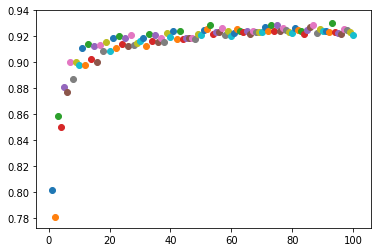

In [223]:
# パラメータ(決定木の個数)を変えて学習させる
for n_e in range(100):
    estimator = RandomForestClassifier(n_estimators=n_e+1)
    sum = 0.0
    for n in range(100):
        data_train_s, data_test_s, label_train_s, label_test_s = train_test_split(data_train, label_train, test_size=0.4)
        estimator.fit(data_train_s, label_train_s)
        sum += estimator.score(data_test_s, label_test_s)
    pyplot.scatter(n_e+1, sum/100)



In [281]:
# それぞれの作者ごとに１つのファイルにまとめる。
!rm akuta/in.csv
!cat akuta/* > akuta/in.csv

!rm izumi/in.csv
!cat izumi/* > izumi/in.csv

!rm umino/in.csv
!cat umino/* > umino/in.csv

!rm kisida/in.csv
!cat kisida/* > kisida/in.csv

!rm toyosima/in.csv
!cat toyosima/* > toyosima/in.csv

rm: toyosima/in.csv: No such file or directory


In [282]:
# 初期準備(空のファイルout.csvを作っておく)
!rm out.csv
!touch out.csv

In [283]:
# 引数で指定したファイルの中から名詞を取り出す関数
import re
import numpy as np
import pyprind
import pandas as pd
import os
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def createNone(in_name):
    words = ""
    data_count = 0
    with open("out.csv") as f:
        lines = f.readlines()
    with open("out.csv", "w") as f_out:
        for line in lines:
            f_out.write("{}\n".format(line[:-1]))
        with open("{}".format(in_name)) as f_in:        
            line = f_in.readline()
            html_row_line = re.match("([^,]*),([^,]*)", line)
            html = html_row_line.group(1)
            row = html_row_line.group(2)
            while line:
                search_line = re.match("([^,]*,){3}([^,]*),([^,]*)", line)
                if search_line is not None:
                    if search_line.group(3) == "名詞" or search_line.group(3) == "動詞":
                        words += " " + search_line.group(2)
                line = f_in.readline()
                html_row_line = re.match("([^,]*),([^,]*)", line)
                if html_row_line is None:
                    f_out.write("{}\n".format(words))
                    data_count+=1
                    break
                if html_row_line.group(1) != html:
                    f_out.write("{}\n".format(words))
                    words = ""
                    data_count+=1
                    html = html_row_line.group(1)
    return data_count
    

In [284]:
# ファイルから名詞を取り出すと同時に、学習用のラベルを作る。
label_train = []

for n in range(createNone("akuta/in.csv")):
    label_train.append(0)

for n in range(createNone("izumi/in.csv")):
    label_train.append(1)
    
for n in range(createNone("umino/in.csv")):
    label_train.append(2)

for n in range(createNone("kisida/in.csv")):
    label_train.append(3)
    
for n in range(createNone("toyosima/in.csv")):
    label_train.append(4)
    
print(label_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [285]:
# 名詞を特徴ベクトルに変換 (BoW)
count = CountVectorizer() 
with open("out.csv") as f:
    lines = f.readlines()
    bag = count.fit_transform(lines)


In [286]:
# 単語の関連性を評価(TF-IDF)
np.set_printoptions(precision=2)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
data_train = tfidf.fit_transform(count.fit_transform(lines)).toarray()


In [287]:
# 学習
estimator = RandomForestClassifier(n_estimators=10)
estimator.fit(data_train, label_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [288]:
# 元データを入れて試してみる
label_predict = estimator.predict(data_train)
print(label_predict)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [289]:
print(estimator.score(data_train, label_train))

0.998898678414097


In [290]:
# 6割を学習用、 4割を試験用にする
data_train_s, data_test_s, label_train_s, label_test_s = train_test_split(data_train, label_train, test_size=0.4)

# 学習用に切り出したやつだけで学習
estimator.fit(data_train_s, label_train_s)

# 予測。正解が分かってる場合は、predict関数じゃなくてこうやると、正解率出してくれる
print(estimator.score(data_test_s, label_test_s))

0.8406593406593407
